In [1]:
import pandas as pd
df2=pd.read_csv('df2.csv',index_col=0)
df2

,review,ratio
0,The car park was small and unpleasant People ...,3.000000
1,We weren t told that the only spa facility op...,0.666667
2,I asked how far the O2 was and got told a 7 m...,1.000000
3,Hot stuffy room air con not working properly ...,1.000000
4,Although the price seems like it is cheap you...,2.750000
...,...,...
9573,,1.500000
9574,good value for money,0.500000
9575,Good location easy to park,0.250000
9576,Location was great staff pretty good and it w...,1.000000


In [16]:
reviews = []
for i in df2['review']:
    reviews.append(i)

In [35]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\황영하\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\황영하\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
reviews = str(reviews)

In [29]:
# 단어 -> 토큰화
print(sent_tokenize(reviews))

["[' The car park was small and unpleasant People with Mercedes and BMWs took over 2 spaces We were lucky to get a space after driving around about 10 times ', ' We weren t told that the only spa facility open was the pool and the sauna but we had already paid and had to find out ourselves when entering the spa area ', ' I asked how far the O2 was and got told a 7 minute walk no no way it was 2 trains away being on my own I was not very happy other than that it was ok', ' Hot stuffy room air con not working properly Filthy windows Wallpaper ripped and worn bedside furniture tatty carpets worn and damaged bathroom door latch worn making door difficult to open from the inside Shower from another era controlled by bath taps Poor shower curtain too resulting in wet floor Carpets in corridors worn out and tatty nasty musty aroma to these areas too All in all this place is around ten years overdue a complete renovation ', ' Although the price seems like it is cheap you have to pay extra for 

In [30]:
# 단어 단위로 자르기
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(str(reviews[:100]))

['The',
 'car',
 'park',
 'was',
 'small',
 'and',
 'unpleasant',
 'People',
 'with',
 'Mercedes',
 'and',
 'BMWs',
 'took',
 'over',
 '2',
 'spaces',
 'We',
 'were',
 'lu']

In [33]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [36]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [38]:
# Text클래스를 통해 토큰열 입력
from nltk import Text
text = Text(retokenize.tokenize(reviews))

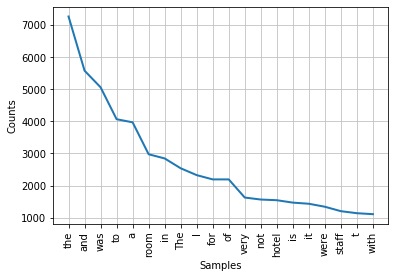

In [40]:
text.plot(20)

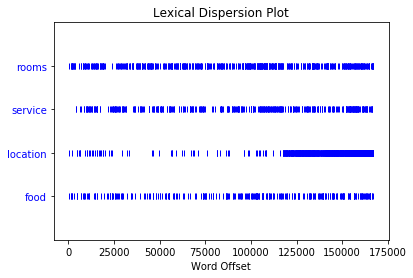

In [42]:
# 단어들이 나온 위치, 빈도
text.dispersion_plot(["rooms", "service", "location", "food"])

In [54]:
from nltk.tag import pos_tag

In [57]:
from nltk import FreqDist
nltk.download('averaged_perceptron_tagger')
stopwords = ["oops", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
review_tokens = pos_tag(retokenize.tokenize(reviews))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\황영하\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [59]:
review_list = [r[0] for r in reviews if r[0] not in stopwords]

In [61]:
fd_names = FreqDist(review_list)